# Deutsch–Jozsa Algorithm

In this notebook, we introduce Deutsch-Jozsa algorithm, an extension of Deutsch algorithm. We discuss statistical properties of the permissible input functions in the context of the algorithm's "promise" problem. We then present the algorithm, verify its correctness, and compare quantum and classical strategies, analyzing their implications in the best-case, average-case, and worst-case scenarios.

# Table of Contents
1. **Introduction**
2. **Example of non-constnat, non-balanced of $f_n$**
3. **Number of Constant or Balanced Functions**
4. **Deutsch-Jozsa Problem Statement**
5. **Quantum Algorithm**
6. **Circuit Visualization for $n = 3$**
7. **Proof of Correctness**
8. **Classical Stategy and Comparision of Quantum and Classical Strategies**

## Appendices
9. **Appendix 1: References**
10. **Appendix 2: Deutsch-Jozsa Circuit in PennyLane**

### Introduction

The Deutsch–Jozsa algorithm is an extension of the Deutsch algorithm, which we have already explored [here](https://sohrabganjian.github.io/blog/2025/deutsch-algorithm/). The Deutsch algorithm examines the interaction of an oracle with a single-variable Boolean function, 

$$f_1: \{ 0,1 \} \rightarrow \{ 0,1 \}.$$

The Deutsch–Jozsa algorithm generalizes this to study $n$-variable Boolean functions, 

$$f_n: \{ 0,1 \}^n \rightarrow \{ 0,1 \}.$$

For single-variable Boolean functions ($f_1$), the function is guaranteed to be either constant or balanced. In contrast, no such guarantee exists for general $n$-variable Boolean functions ($f_n$). However, in the Deutsch–Jozsa problem, the algorithm is "promised" that $ f_n $ is guaranteed to be either entirely constant or balanced. 

---

### Example of non-constnat, non-balanced of $f_n$:


A simple example of Boolean function $f_n: \{ 0,1 \}^n \rightarrow \{ 0,1 \}$ that is neither constant nor balanced is:
$$
f_n(x_1, x_2, \dots, x_n) = x_1 \vee x_2 \vee \dots \vee x_n 
$$

 - $\textbf{$f_n$ is non-constant}$: $f_n(0,0,\dots,0)=0$, but $f_n(1,0,\dots,0) = 1$. 
 - $\textbf{$f_n$ is non-balanced}$: A function is balanced if it outputs $0$ and $1$ for exacly half of the inputs, $2^{n-1}$ times. For the OR function $f_n$, $f_n(x) = 0 \Leftrightarrow x = (0,0,\dots,0)$. This implies that $f_n$ outputs $1$, $2^{n} - 1$ times, and outputs $0$ exactly once. Hence $f_n$ is non-balanced. 
 
This shows that not all Boolean functions are constant or balanced. Hence, that is why Deutsch-Jozsa algorithm is considered a _promise_ problem. It is promised that the function $f_n$ is either constant or balanced. 

---

### Number of Constant or Balanced Functions

The domain has a total size of $\left| \{ 0,1 \}^n \right| = 2^n$, while the size of the range is $| \{ 0,1\}| = 2$. Consequently, there are $2^{2^n}$ possible functions, though, as established, not all are necessarily constant or balanced. 

Among these, only two functions are constant: one where all inputs map to 0 and another where all inputs map to 1.  

Now to count the balanced functions, note that there are $2^n$ possibel inputs. A balanced function must map exactly half of them to 0 and the other half to 1. The number of ways to select which $2^{n-1}$ inputs map to 0 (with the remaining inputs automatically mapping to 1) is given by: 
$$
{2^n \choose {2^{n-1}}} .
$$

---

### Deutsch-Jozsa Problem Statement

Problem: Given an oracle (black-box implementation) of an $n$-variable Boolean function $f_n: \{ 0,1 \}^n \rightarrow \{ 0,1 \}$, determine whether $f_n$ is:

1. Constant (outputs 0 for all inputs or 1 for all inputs),
2. Balanced (outputs 0 for exactly half of all inputs and 1 for the other half).

---

### Quantum Algorithm

1. **Initialization**: The algorithm starts with an $n$-qubit register initialized to 
   $|0\rangle^{\otimes n}$ and an ancillary qubit set to $|1 \rangle$:
   $$
   |\psi_0 \rangle = |0\rangle^{\otimes n} \otimes |1\rangle.
   $$
   
2. **Hadamard Transformation**: Apply Hadamard gates to all qubits, transforming the state into:
   $$
   |\psi_1\rangle = H^{\otimes n+1} |\psi_0\rangle.
   $$
   
3. **Oracle Query**: The oracle $U_{f_n}$ is applied, performing the transformation:
   $$
   |\psi_2\rangle = U_{f_n} |\psi_1\rangle.
   $$

4. **Final Hadamard Transformation**: Applying Hadamard gates to the first $n$ qubits results in:
   $$
   |\psi_3 \rangle = H^{\otimes n} |\psi_2 \rangle.
   $$

5. **Measurement**: 
   The final measurement is performed in the computational basis, specifically projecting onto the $ |0\rangle^{\otimes n} $ state:

$$
M_0 = |0\rangle\langle0|^{\otimes n}.
$$

Applying this measurement operator to the final state $ |\psi_3\rangle $:

$$
p_0 = \langle \psi_3 | M_0 |\psi_3\rangle = |\langle 0^{\otimes n} | \psi_3 \rangle|^2.
$$

- If $ p_0 = 1 $, the function $ f_n $ is constant.
- If $ p_0 = 0 $, the function $ f_n $ is balanced.

---

### Circuit Visualization for $n = 3$

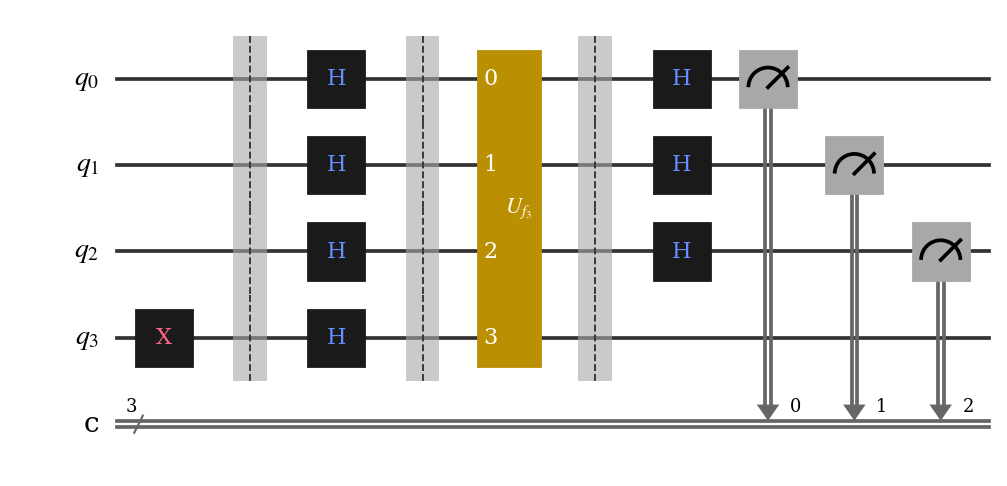

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
import matplotlib.pyplot as plt

# Configure Matplotlib for LaTeX-like rendering
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'serif'

n = 3  # Input qubits (q_0 to q_2)
qc = QuantumCircuit(n+1, n)  # +1 for ancillary qubit (q_3)

# Step 1: Apply X to ancillary qubit (q_3) in its own layer
qc.x(n)
qc.barrier()

# Step 2: Apply H to all qubits (q_0 to q_3) in a single layer
qc.h(range(n+1))
qc.barrier()

# Step 3: Oracle (placeholder)
oracle_gate = Gate(name=f"$U_{{f_{n}}}$", num_qubits=n+1, params=[])
qc.append(oracle_gate, range(n+1))
qc.barrier()

# Step 4: Post-oracle Hadamards and measurement
qc.h(range(n))
qc.measure(range(n), range(n))

# ========== Custom Styling ========== #
style = {
    # "name": "custom",
    "backgroundcolor": "#FFFFFF",  # White background
    # "textcolor": "#6b0212",        # Dark text
    # "subtextcolor": "#6b0212",
    "linecolor": "#333333",      # qubit line register color
    "creglinecolor": "#666666",  # classical register color
    "displaycolor": {  
        "h": ("#1a1a1a", "#648FFF"),  # (background color, text color)
        "x": ("#1a1a1a", "#FF6480"),
        "$U_{f_3}$": ("#ba8f02", "#FFFFFF")  # Lowercase for gate type
    },
    "plotbarrier": True,  # Show barriers
    "fontsize": 12,
    "subfontsize": 10,
    "figwidth": 10,
    "dpi": 300
}

# Draw the circuit with custom style
qc.draw(
    output="mpl",
    style=style,
    plot_barriers=True,
    scale=1,
)

---
### Proof of Correctness

To verify the correctness of the Deutsch-Jozsa algorithm, we analyze the transformations applied to the quantum state throughout the procedure.

To facilitate the computation, we first analyze the effect of the Hadamard transform on the first $ n $ qubits separately before applying it to the entire system.
$$
\begin{aligned}
H^{\otimes n} |0\rangle^{\otimes n} &= \underbrace{H |0\rangle \otimes H |0\rangle \otimes \dots \otimes H |0\rangle}_{n \text{ times}}  \\
&= \frac{1}{\sqrt{2}} \left( |0 \rangle + | 1 \rangle \right) \otimes \frac{1}{\sqrt{2}} \left( |0 \rangle + | 1 \rangle \right) \otimes \dots \frac{1}{\sqrt{2}} \left( |0 \rangle + | 1 \rangle \right) \\
&= \frac{1}{\sqrt{2}^n} \left[ |\underbrace{00 \dots 0}_{n \text{ times}} \rangle + |\underbrace{00 \dots 0}_{n-1 \text{ times}} 1 \rangle + \dots + |\underbrace{11 \dots 1}_{n \text{ times}} \rangle  \right] \\
&= \frac{1}{\sqrt{2}^n} \sum\limits_{x \in \{0,1\}^n} |x \rangle
\end{aligned}
$$

Since the Hadamard operation is applied to all $ n+1 $ qubits, we now extend this to include the ancillary qubit:

$$
\begin{aligned}
H^{\otimes n+1} |\psi_0 \rangle &= H^{\otimes n+1} \left[ | 0 \rangle^{\otimes n} \otimes | 1 \rangle \right] \\
&= \frac{1}{\sqrt{2}^{n+1}} \sum\limits_{x \in \{ 0,1 \}^n} |x\rangle \otimes \left( |0\rangle - |1\rangle \right) \\
&= | \psi_1 \rangle
\end{aligned}
$$

Next, we apply the oracle $ U_{f_n} $. The oracle acts as follows:
$$
\begin{aligned}
U_{f_n} | \psi_1 \rangle 
&= \frac{1}{\sqrt{2}^{n+1}} \sum\limits_{x \in \{ 0,1 \}^n} |x\rangle \otimes \left( |f_n(x) \rangle - |1 \oplus f_n(x) \rangle \right) \\
&= \frac{1}{\sqrt{2}^{n+1}} \sum\limits_{x \in \{ 0,1 \}^n} (-1)^{f_n(x)} |x\rangle \otimes \left( |0 \rangle - |1 \rangle \right) \\
&= | \psi_2 \rangle
\end{aligned}
$$

Then, to extract the information about $ f_n(x) $, we apply a Hadamard transform to the first $ n $ qubits:

$$
\begin{aligned}
\left[ H^{\otimes n} \otimes I \right] |\psi_2 \rangle
\end{aligned}
$$

Let $x$ be a fixed choice from $\{ 0,1 \}^n$. Then,
$$
\begin{aligned}
H^{\otimes n} |x \rangle &= H^{\otimes n} |x_1 x_2 \dots x_n \rangle \\
&=  H |x_1 \rangle \otimes H |x_2 \rangle \otimes \dots \otimes H |x_n \rangle 
\end{aligned}
$$

Note if $x_i = 0$, then $H | x_i \rangle = \frac{1}{\sqrt{2}} \left(  |0\rangle \textcolor{red}{+} |1\rangle  \right) $ and if $x_i = 1$, then $H | x_i \rangle = \frac{1}{\sqrt{2}} \left(  |0\rangle \textcolor{red}{-} |1\rangle  \right) $. Therefore, we compactly express $H | x_i \rangle = \frac{1}{\sqrt{2}} \left( |0 \rangle + (-1)^{x_i} |1\rangle \right) $ 

Hence, 

$$
\begin{aligned}
H^{\otimes n} |x \rangle &= \left[ \frac{1}{\sqrt{2}} \left( |0\rangle + (-1)^{x_1} |1 \rangle \right) \right] \otimes
\left[ \frac{1}{\sqrt{2}} \left( |0\rangle + (-1)^{x_2} |1 \rangle \right) \right] \otimes \dots \otimes
\left[ \frac{1}{\sqrt{2}} \left( |0\rangle + (-1)^{x_n} |1 \rangle \right) \right] \\
&= \left[ \frac{1}{\sqrt{2}} \sum\limits_{z_1 = 0}^{1} (-1)^{x_1 \cdot z_1} |z_1 \rangle \right] 
\otimes \left[ \frac{1}{\sqrt{2}} \sum\limits_{z_2 = 0}^{1} (-1)^{x_2 \cdot z_2} |z_2\rangle \right] 
\otimes \dots 
\otimes \left[ \frac{1}{\sqrt{2}} \sum\limits_{z_n = 0}^{1} (-1)^{x_n \cdot z_n} |z_n \rangle \right]  \\
&= \frac{1}{\sqrt{2}^n}
\sum\limits_{z_1 = 0}^{1} \sum\limits_{z_2 = 0}^{1} \dots \sum\limits_{z_n = 0}^{1}
\left[ \prod\limits_{i=1}^{n} \left( -1 \right)^{x_i \cdot z_i} \right] |z_1 z_2 \dots z_n \rangle \\
&= \frac{1}{\sqrt{2}^n}
\sum\limits_{z_1 = 0}^{1} \sum\limits_{z_2 = 0}^{1} \dots \sum\limits_{z_n = 0}^{1}
\left[ \left( -1 \right)^{\sum\limits_{i=1}^{n}  x_i \cdot z_i} \right] |z_1 z_2 \dots z_n \rangle  \\
&=
\frac{1}{\sqrt{2}^n} \sum\limits_{z \in \{0,1\}^n } \left( -1 \right)^{x \cdot z} |z \rangle 
\end{aligned}
$$

Therefore, 

$$
\begin{aligned}
H^{\otimes n} \otimes I |\psi_2 \rangle
&= \frac{1}{2^n} \sum\limits_{ x \in \{ 0,1 \}^n } \sum\limits_{z \in \{0,1 \}^n } (-1)^{f_n(x)} \left( -1 \right)^{x \cdot z} | z \rangle
\frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
&= \frac{1}{2^n} \sum\limits_{ x \in \{ 0,1 \}^n } \sum\limits_{z \in \{0,1 \}^n } (-1)^{f_n(x) + x \cdot z} | z \rangle
\frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
\end{aligned}
$$


Note that the order of summation can be swapped: 

$$
\begin{aligned}
&= \frac{1}{2^n} \sum\limits_{ x \in \{ 0,1 \}^n } \sum\limits_{z \in \{0,1 \}^n } (-1)^{f_n(x) + x \cdot z} | z \rangle
\frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
&= \frac{1}{2^n}  \sum\limits_{z \in \{0,1 \}^n } \sum\limits_{ x \in \{ 0,1 \}^n } (-1)^{f_n(x) + x \cdot z} | z \rangle
\frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
&=  \sum\limits_{z \in \{0,1 \}^n } \sum\limits_{ x \in \{ 0,1 \}^n } \frac{1}{2^n}  (-1)^{f_n(x) + x \cdot z} | z \rangle
\frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
&= |\psi_3 \rangle
\end{aligned}
$$

Finally we make the measurement of the first $n$ qubits and ignoring the last qubit in all zero state when $z = 0 \dots 0$:

$$
\begin{aligned}
p_0 = P(00 \dots 0) = \left| \sum\limits_{x \in \{ 0,1 \}^n } \frac{1}{2^n} \left( -1 \right)^{f_n(x)} \left( -1 \right)^{x \cdot z} \right|^2
\end{aligned}
$$

There are two cases to consider:

1) $f_n(x)$ is constant, in which case, $f_(x) = 1$ always or $f_n(x) = 0$ always. Either way, $\left( -1 \right)^{f_n(x)} = \pm 1$.  Note that $\left| \sum\limits_{x \in \{ 0,1 \}^n } \left(-1 \right)^{f_n(x)} \right| = 2^n \cdot 1 = 2^n$. Additionally, with $z=0\dots0$, $\left(-1 \right)^{x \cdot z} = 1$.
In conclusion, if $f_n(x)$ is constant, then 
$$
\begin{aligned}
P(00 \dots 0) &= \left| \sum\limits_{x \in \{ 0,1 \}^n } \frac{1}{2^n} \left( -1 \right)^{f_n(x)} \left( -1 \right)^{x \cdot z} \right|^2 \\
&= \frac{2^n}{2^n} \\
&= 1. 
\end{aligned}
$$

2) $f_n(x)$ is balanced. That is, in exacly $2^{n-1}$ of times $f_n(x) = 0$ and the other $2^{n-1}$ times, $f_n(x) = 1$. In this case, $\sum\limits_{x \in \{ 0,1 \}^n} \left(-1 \right)^{f_n(x)} = 2^{n-1} - 2^{n-1} = 0$.  Additionally, with $z=0$, $(-1)^{x \cdot z} = 1$ for all $x$, which is an important requirement for ensuring of the correctness of this arguement. In conclusion, if $f_n(x)$ balanced, then
$$
\begin{aligned}
P(00 \dots 0) &= \left| \sum\limits_{x \in \{ 0,1 \}^n } \frac{1}{2^n} \left( -1 \right)^{f_n(x)} \left( -1 \right)^{x \cdot z} \right|^2 \\
&= 0. 
\end{aligned}
$$

It follows that the Deutsch-Jozsa algorithm can determine whether $f_n(x)$ is balanced or constant with exactly one query! 

---
### Classical Stategy and Comparision of Quantum and Classical Strategies

In the classical setting, if $ f_n $ is a constant function (which is statistically less probable due to the larger number of balanced functions compared to constant ones), then in the worst-case scenario, $ 2^{n-1} + 1 $ queries are required to definitively confirm that $ f_n $ is indeed constant. This is because, in the worst case, one could observe $ 2^{n-1} $ identical function evaluations without ruling out the possibility that the next query will return a different output. Only after an additional query confirming the same output can one be certain that the function is constant. 



The quantum strategy still outperforms the classical strategy even in the best-case scenario. If $ f_n $ is balanced, the classical approach requires at least two queries to conclusively determine that the function is balanced.: one observation of $ 0 $ and another observation of $ 1 $. 

In contrast, the quantum algorithm still requires only a single query. However, in this case, the speedup is less impressive compared to the worst-case scenario.

Furthermore, since the number of balanced functions overwhelmingly exceeds the number of constant functions, a uniformly random selection of $ f_n $ is far more likely to yield a balanced function. 


Additionally, in the classical setting, while the worst-case complexity is exponential, heuristic arguments suggest that the expected number of queries required to determine whether $ f_n $ is balanced or constant scales as $ \mathcal{O}(\log n) $. This follows from the fact that, when $ f_n $ is balanced, only a small number of queries (on the order of $\log n$ or less) are typically needed to observe a contradiction.  

However, to clarify, the Deutsch-Jozsa algorithm always solves the problem in a single query, providing a **logarithmic speedup on average**. However, in the **worst-case** scenario, the quantum strategy still achieves an **exponential** speedup, reducing the classical complexity of $ \mathcal{O}(2^n) $ to just $ \mathcal{O}(1) $ in the quantum setting.

---
## Appendices
---

### Appendix 1: References 

- [Deutsch–Jozsa Algorithm (Wikipedia)](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)
- [Cambridge Quantum Computing Lecture 7](https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_7.pdf), University of Cambridge, taught by Dr. Steven Herbert (2019–2020). [Course homepage](https://www.cl.cam.ac.uk/teaching/1920/QuantComp/).
- [Original Paper: Deutsch & Jozsa (1992)](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167)

---
### Appendix 2: Deutsch-Jozsa Circuit in PennyLane

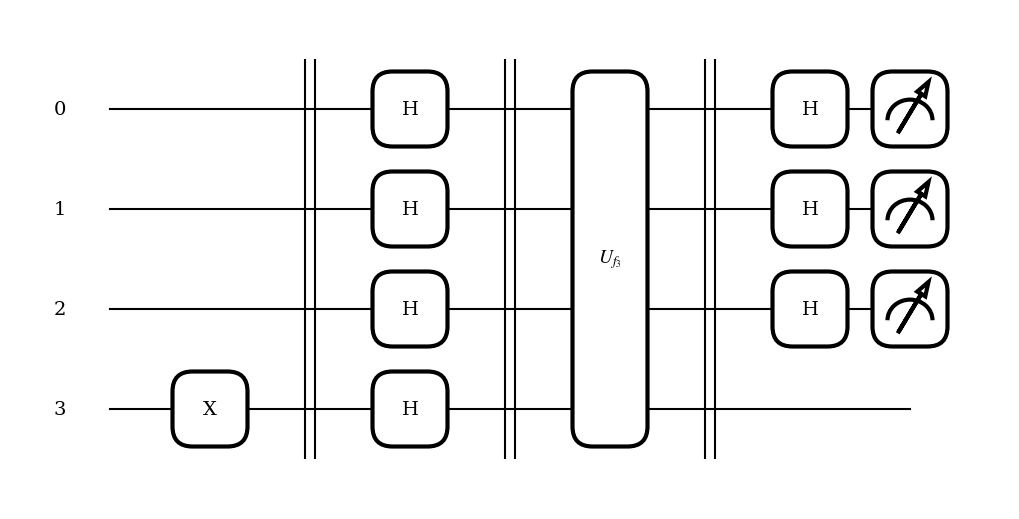

In [2]:
import pennylane as qml
import matplotlib.pyplot as plt

n = 3
dev = qml.device("default.qubit", wires=n+1)

class Oracle(qml.operation.Operation):
    num_wires = n+1
    grad_method = None
    def __init__(self, wires, id=None):
        super().__init__(wires=wires, id=id)
    def label(self, decimals=None, base_label=None, cache=None):
        return f"$U_{{f_{n}}}$"

@qml.qnode(dev)
def deutsch_jozsa_circuit():
    qml.PauliX(wires=n)
    qml.Barrier(wires=range(n+1))
    for wire in range(n+1):
        qml.Hadamard(wires=wire)
    qml.Barrier(wires=range(n+1))
    Oracle(wires=range(n+1))
    qml.Barrier(wires=range(n+1))
    for wire in range(n):
        qml.Hadamard(wires=wire)
    return qml.probs(wires=range(n))

fig, ax = qml.draw_mpl(deutsch_jozsa_circuit)()
plt.show()